## **IMPORTING LIBRARIES:**

In [9]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [2]:
from tensorflow.keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,BatchNormalization,InputLayer
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

## **IMPORTING CSV FILE AND BASIC STATISTICS OF THE DATA**

In [3]:
df  = pd.read_csv("age_gender.csv")

In [4]:
df.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


In [5]:
df['pixels'] =df['pixels'].apply(lambda x : np.array(x.split(),dtype="float32"))

In [6]:
df['pixels'] = df['pixels'].apply(lambda x : x /255)

In [7]:
df.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,"[0.5058824, 0.5019608, 0.5019608, 0.49411765, ..."
1,1,2,0,20161219222752047.jpg.chip.jpg,"[0.6431373, 0.2901961, 0.43529412, 0.65882355,..."
2,1,2,0,20161219222832191.jpg.chip.jpg,"[0.2627451, 0.27450982, 0.2784314, 0.27450982,..."
3,1,2,0,20161220144911423.jpg.chip.jpg,"[0.75686276, 0.77254903, 0.7764706, 0.78431374..."
4,1,2,0,20161220144914327.jpg.chip.jpg,"[0.7921569, 0.8039216, 0.81960785, 0.8235294, ..."


In [8]:
x = np.array(df['pixels'].tolist())
x = x.reshape(x.shape[0],48,48,1)

In [10]:
x.shape

(23705, 48, 48, 1)

## **SAMPLE IMAGES**

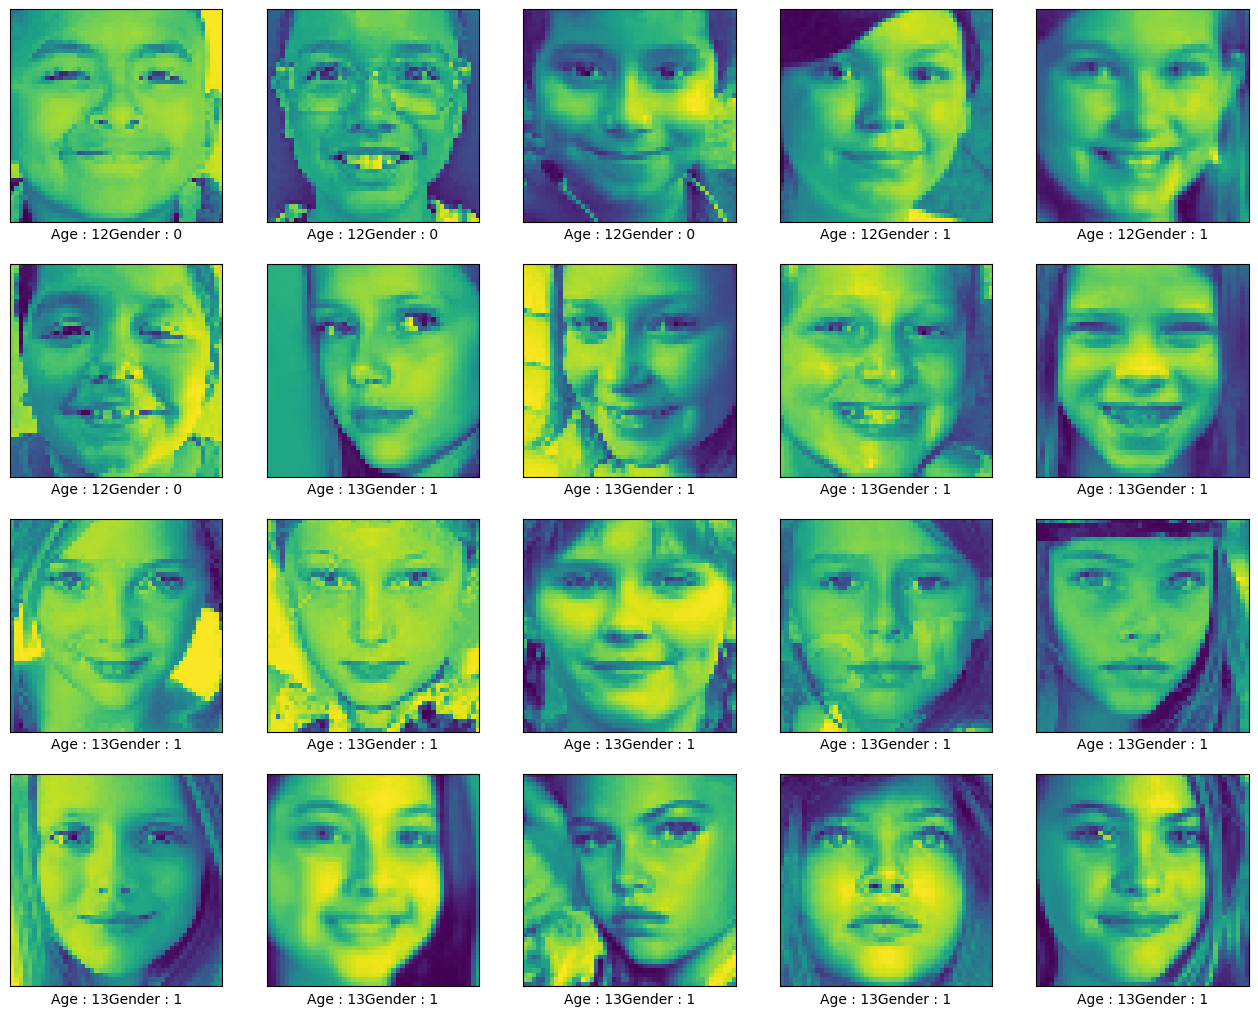

In [35]:
plt.figure(figsize=(16,16))

for i in range(1500,1520):
    plt.subplot(5,5,(i%25)+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(df['pixels'].iloc[i].reshape(48,48))
    plt.xlabel(
    "Age : "+ str(df['age'].iloc[i])+
    "Gender : " +str(df['gender'].iloc[i])
    )
plt.show()

## **DATA VISUALISATION**

<Axes: ylabel='count'>

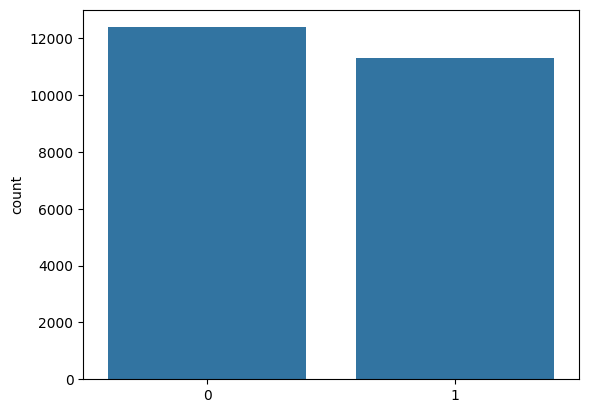

In [12]:
sns.countplot(x=df['gender'].values)

<Axes: xlabel='age', ylabel='Density'>

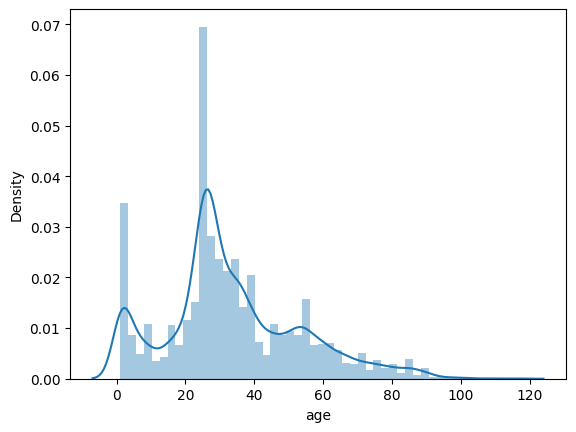

In [13]:
sns.distplot(a=df['age'])

## **MODEL: GENDER**

In [14]:
y = df['gender']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.22,random_state=42)

In [15]:
class Custom(Callback):
    def on_epoch_end(self,epochs,logs={}):
        if logs.get("val_loss")<0.2700:
            print("Reached Loss 0.2700 !")
            self.model.stop_training= True

callback = Custom()
callbacks= [callback]

In [16]:
model = Sequential([
    InputLayer((48,48,1)),
    Conv2D(32,(3,3),input_shape=(32,32,3),activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64,(3,3),activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),


    Flatten(),
    Dense(64,activation='relu'),
    Dropout(0.2),
    Dense(1,activation='sigmoid')

])

model.compile(loss='binary_crossentropy',optimizer='sgd',metrics=['acc'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 46, 46, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 21, 21, 64)        256       
 chNormalization)                                                
                                                        

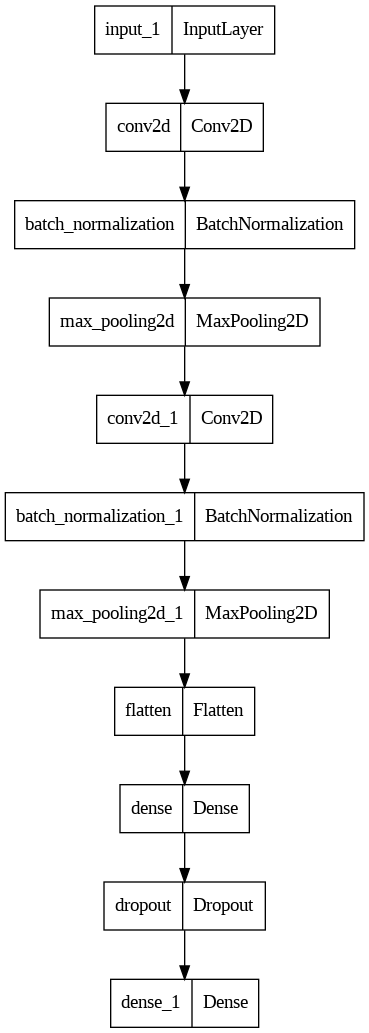

In [18]:
plot_model(model)

In [19]:
history =  model.fit(x_train,y_train,epochs=30,validation_split=0.1,batch_size=64,callbacks=callbacks)

Epoch 1/30
260/260 [==============================] - 38s 144ms/step - loss: 0.4296 - acc: 0.7969 - val_loss: 0.5558 - val_acc: 0.7301
Epoch 2/30
260/260 [==============================] - 31s 119ms/step - loss: 0.3152 - acc: 0.8597 - val_loss: 0.3343 - val_acc: 0.8486
Epoch 3/30
260/260 [==============================] - 32s 124ms/step - loss: 0.2765 - acc: 0.8773 - val_loss: 0.2762 - val_acc: 0.8718
Epoch 4/30
260/260 [==============================] - 30s 117ms/step - loss: 0.2538 - acc: 0.8906 - val_loss: 0.2987 - val_acc: 0.8621
Epoch 5/30
260/260 [==============================] - 31s 118ms/step - loss: 0.2290 - acc: 0.9052 - val_loss: 0.2597 - val_acc: 0.8816


<Axes: title={'center': 'accuracy'}>

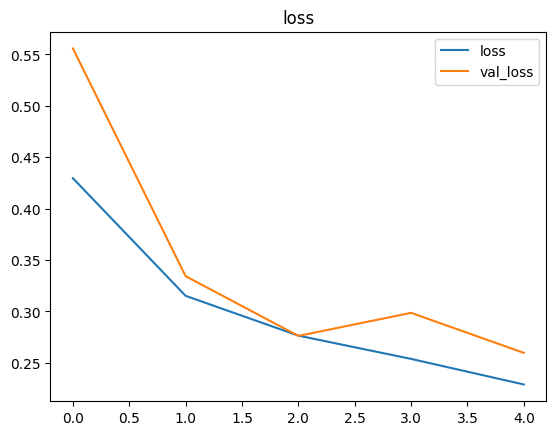

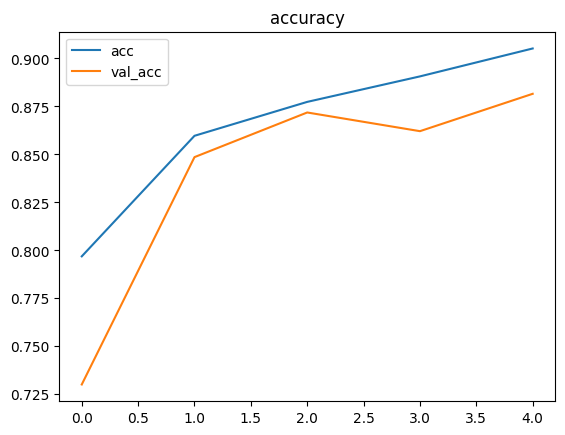

In [20]:
history_df = pd.DataFrame(history.history)
history_df[['loss','val_loss']].plot(title='loss')
history_df[['acc','val_acc']].plot(title='accuracy')

In [21]:
loss,acc = model.evaluate(x_test,y_test)
acc

163/163 [==============================] - 3s 16ms/step - loss: 0.2694 - acc: 0.8846


0.8845859169960022

## **MODEL: AGE**

In [22]:
class Custom(Callback):
    def on_epoch_end(self,epochs,logs={}):
        if (logs.get("val_loss")<110):
            print("Reached 110 val_loss  !")
            self.model.stop_training= True

callback = Custom()
callbacks= [callback]

In [23]:
y = df['age']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.22,random_state=42)

In [24]:
model_age = Sequential([
    InputLayer((48,48,1)),
    Conv2D(32,(3,3),input_shape=(32,32,3),activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64,(3,3),activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(128,(3,3),activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(64,activation='relu'),
    Dropout(0.5),
    Dense(1,activation='relu')

])

model_age.compile(loss='mean_squared_error',optimizer='adam',metrics=['mae'])

In [25]:
model_age.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 batch_normalization_2 (Bat  (None, 46, 46, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 23, 23, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 batch_normalization_3 (Bat  (None, 21, 21, 64)        256       
 chNormalization)                                                
                                                      

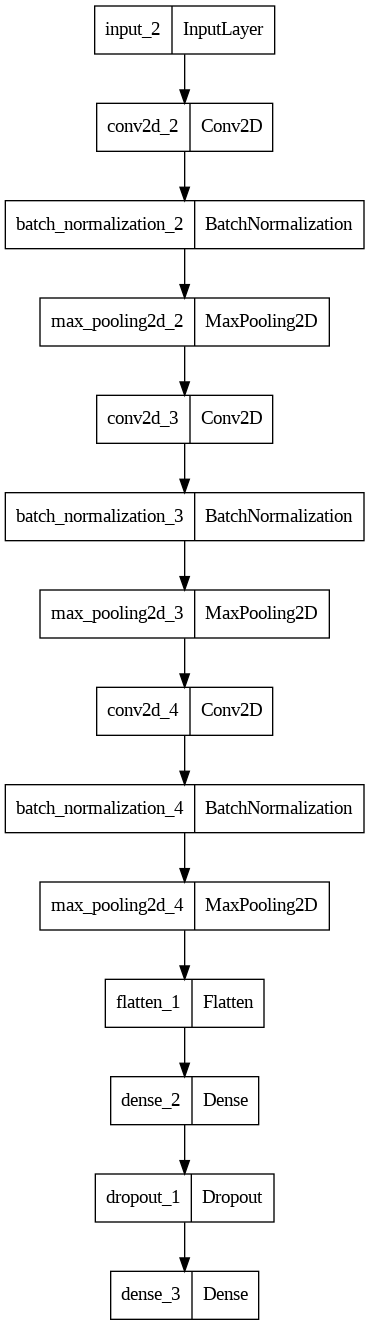

In [26]:
plot_model(model_age)

In [27]:
history = model_age.fit(x_train,y_train,epochs=20,validation_split=0.1,batch_size=64,callbacks=callbacks)

Epoch 1/20
260/260 [==============================] - 38s 144ms/step - loss: 238.6214 - mae: 11.5368 - val_loss: 313.8587 - val_mae: 13.9602
Epoch 2/20
260/260 [==============================] - 37s 143ms/step - loss: 162.5479 - mae: 9.4927 - val_loss: 165.4943 - val_mae: 9.6202
Epoch 3/20
260/260 [==============================] - 37s 141ms/step - loss: 144.5784 - mae: 8.9301 - val_loss: 115.6303 - val_mae: 8.1942
Epoch 4/20
260/260 [==============================] - 38s 145ms/step - loss: 133.5838 - mae: 8.6094 - val_loss: 491.1807 - val_mae: 17.2087
Epoch 5/20
260/260 [==============================] - 37s 141ms/step - loss: 127.1672 - mae: 8.3871 - val_loss: 190.9319 - val_mae: 10.2518
Epoch 6/20
260/260 [==============================] - 37s 141ms/step - loss: 118.1916 - mae: 8.0793 - val_loss: 307.4432 - val_mae: 14.7253
Epoch 7/20
260/260 [==============================] - 38s 145ms/step - loss: 112.2266 - mae: 7.9031 - val_loss: 148.4830 - val_mae: 8.9519
Epoch 8/20
260/260 [==

<Axes: title={'center': 'loss'}>

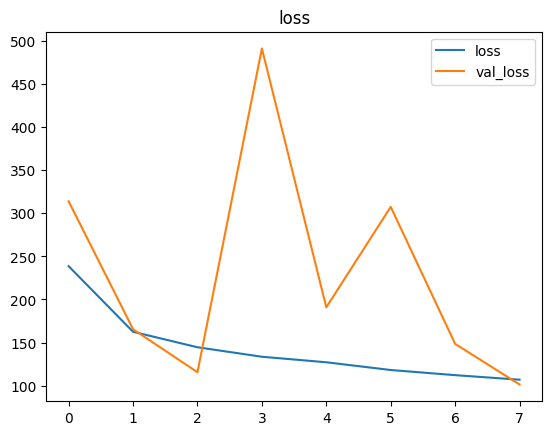

In [28]:
history_df = pd.DataFrame(history.history)
history_df[['loss','val_loss']].plot(title='loss')

In [29]:
mse,mae = model_age.evaluate(x_test,y_test)
mse,mae

163/163 [==============================] - 4s 22ms/step - loss: 98.6913 - mae: 7.4457


(98.69133758544922, 7.445696830749512)

## **PREDICTIONS**

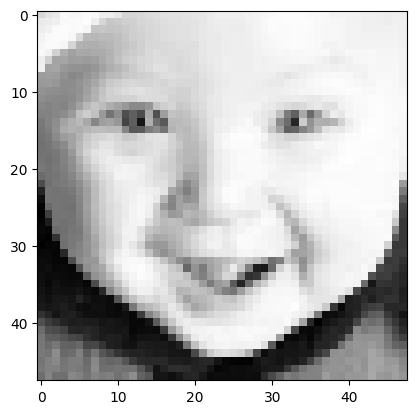

In [57]:
ind = 458
img = df['pixels'].iloc[ind].reshape(48,48)

plt.imshow(img,cmap='gray')
plt.show()

In [58]:
Tage = df['age'].iloc[ind] #True Age
Tgender = df['gender'].iloc[ind] # True gender
Tage,Tgender

(1, 0)

In [59]:
def predict(model_,img):
    pred = np.argmax(model_.predict(img),axis=1)
    return pred

In [60]:
img = img.reshape(-1,48,48,1)
age = predict(model_age,img)[0]


genders = ['male','female']
gender = genders[predict(model,img)[0]]

age,gender

1/1 [==============================] - 0s 15ms/step


(0, 'male')

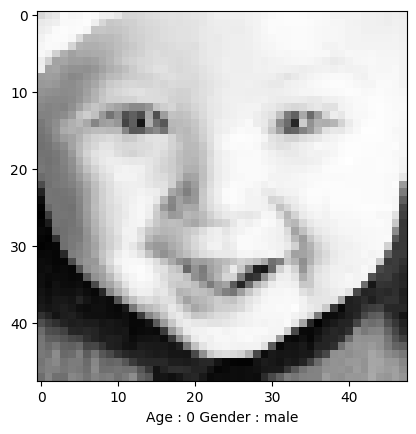

In [61]:
img = img.reshape(48,48,1)
plt.imshow(img,cmap='gray')
plt.xlabel(
    "Age : "+str(age)+
    " Gender : "+gender
)
plt.show()